In [1]:
import math
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
tra_df = pd.read_csv("../dataset/training_dataset/direc/train/new_angle.csv")
val_df = pd.read_csv("../dataset/training_dataset/direc/validation/new_angle.csv")
tes_df = pd.read_csv("../dataset/test_dataset/direc/new_angle.csv")

In [3]:
# def angle_of_vector(x, y):
#     angle = math.degrees(math.atan2(-y, x))   # y軸是相反的
#     if angle<0:
#         return angle+360
#     return angle
     

# def angle_of_line(x1, y1, x2, y2): # 端點 中心
#     angle = math.degrees(math.atan2(-(y1-y2), x1-x2))
#     if angle<0:
#         return angle+360
#     return angle

In [4]:
def angleToClass(angle):
    c = 0
    # if angle>=0 and angle<45:
    #     return 0
    if angle>=90 and angle<110:
        return 0
    elif angle>=110 and angle<130:
        return 1
    elif angle>=130 and angle<180:
        return 2
    else:
        return 'right'
    # elif angle>=130 and angle<180:
        #  return 3
    # elif angle>=180 and angle<225:
    #     return 4


In [5]:
def getClass(df):
    row, col = df.shape
    classs = [] 
    for r in range(row):
        new_angle = df.iloc[r:r+1]['new_angle'].values[0]
        classs.append(angleToClass(new_angle))
    return classs

In [6]:
tra_classs = getClass(tra_df)
tra_df['new_class'] = tra_classs
tra_df.to_csv("../dataset/training_dataset/direc/train/new_class.csv",index=False)

val_classs = getClass(val_df)
val_df['new_class'] = val_classs
val_df.to_csv("../dataset/training_dataset/direc/validation/new_class.csv",index=False)

tes_classs = getClass(tes_df)
tes_df['new_class'] = tes_classs
tes_df.to_csv("../dataset/test_dataset/direc/new_class.csv",index=False)


# 統計分析

In [7]:
print('train dataset')
tra_cls = set(tra_df['new_class'])
for c in tra_cls:
    print('class {} = '.format(c), (tra_df['new_class']==c).sum())

print(min(tra_df['new_angle']), " ~ " ,max(tra_df['new_angle']))

train dataset
class right =  35
class 1 =  35
class 2 =  23
class 0 =  33
75.0  ~  164.0


In [8]:
print('validation dataset')
tra_cls = set(tra_df['new_class'])
for c in tra_cls:
    print('class {} = '.format(c), (val_df['new_class']==c).sum())

print(min(val_df['new_angle']), " ~ " ,max(val_df['new_angle']))

validation dataset
class right =  1
class 1 =  26
class 2 =  17
class 0 =  20
82.0  ~  133.0


In [9]:
print('test dataset')
tra_cls = set(tra_df['new_class'])
for c in tra_cls:
    print('class {} = '.format(c), (tes_df['new_class']==c).sum())

print(min(tes_df['new_angle']), " ~ " ,max(tes_df['new_angle']))

test dataset
class right =  0
class 1 =  21
class 2 =  24
class 0 =  18
93.0  ~  158.0


In [10]:
import matplotlib.pyplot as plt

(array([ 5.,  6., 21.,  8., 13.,  6.,  4., 11., 15.,  4.,  7.,  1., 10.,
         5.,  2.,  2.,  0.,  3.,  2.,  1.]),
 array([ 75.  ,  79.45,  83.9 ,  88.35,  92.8 ,  97.25, 101.7 , 106.15,
        110.6 , 115.05, 119.5 , 123.95, 128.4 , 132.85, 137.3 , 141.75,
        146.2 , 150.65, 155.1 , 159.55, 164.  ]),
 <BarContainer object of 20 artists>)

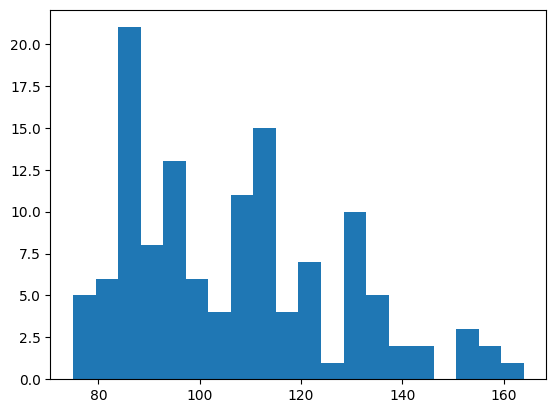

In [11]:
plt.hist(tra_df['new_angle'].values, bins=20)

(array([ 1.,  0.,  0.,  0.,  0.,  3.,  2.,  1.,  4.,  7.,  8.,  3.,  6.,
         4.,  2.,  2.,  1.,  2., 11.,  7.]),
 array([ 82.  ,  84.55,  87.1 ,  89.65,  92.2 ,  94.75,  97.3 ,  99.85,
        102.4 , 104.95, 107.5 , 110.05, 112.6 , 115.15, 117.7 , 120.25,
        122.8 , 125.35, 127.9 , 130.45, 133.  ]),
 <BarContainer object of 20 artists>)

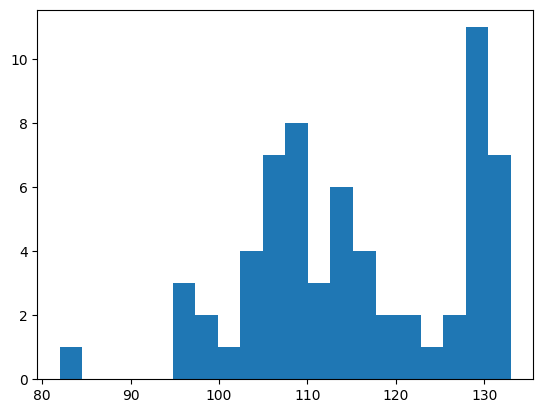

In [12]:
plt.hist(val_df['new_angle'].values, bins=20)

(array([4., 3., 3., 3., 5., 4., 3., 0., 2., 6., 6., 5., 8., 2., 2., 2., 2.,
        1., 1., 1.]),
 array([ 93.  ,  96.25,  99.5 , 102.75, 106.  , 109.25, 112.5 , 115.75,
        119.  , 122.25, 125.5 , 128.75, 132.  , 135.25, 138.5 , 141.75,
        145.  , 148.25, 151.5 , 154.75, 158.  ]),
 <BarContainer object of 20 artists>)

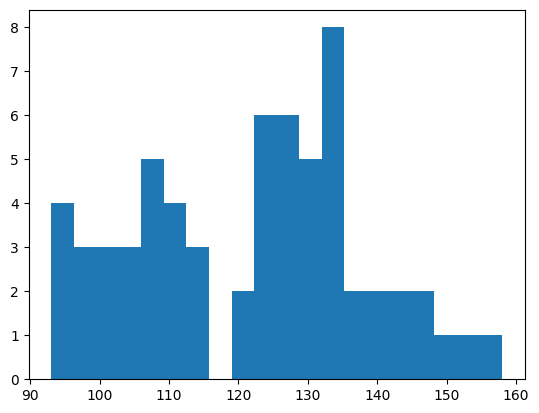

In [13]:
plt.hist(tes_df['new_angle'].values, bins=20)